<a href="https://colab.research.google.com/github/Nnamchisimi/Nnamchisimi/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np


In [ ]:
data=pd.read_csv("housing.csv")
data


In [ ]:
data.info()

In [ ]:
data.dropna(inplace=True)
data.info()

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
y

In [64]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.5)



In [65]:
training_data=X_train.join(y_train)
training_data
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
383,-122.16,37.74,47.0,824.0,223.0,533.0,166.0,2.6250,NEAR BAY
20382,-118.85,34.14,16.0,4109.0,543.0,1409.0,560.0,8.1064,<1H OCEAN
3813,-118.48,34.20,26.0,2027.0,559.0,1545.0,513.0,2.8974,<1H OCEAN
4973,-118.28,34.00,42.0,1534.0,417.0,1295.0,380.0,2.0938,<1H OCEAN
6001,-117.75,34.09,36.0,3094.0,556.0,1672.0,545.0,4.2143,INLAND
...,...,...,...,...,...,...,...,...,...
17291,-119.63,34.40,29.0,3865.0,814.0,1266.0,613.0,6.0069,<1H OCEAN
14221,-117.06,32.66,24.0,2587.0,491.0,1617.0,458.0,3.5066,NEAR OCEAN
4562,-118.26,34.06,15.0,326.0,123.0,490.0,105.0,1.4886,<1H OCEAN
1560,-121.95,37.78,4.0,14652.0,2826.0,5613.0,2579.0,6.3942,<1H OCEAN


In [66]:
training_data=training_data.join(pd.get_dummies(training_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [ ]:
X_train

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

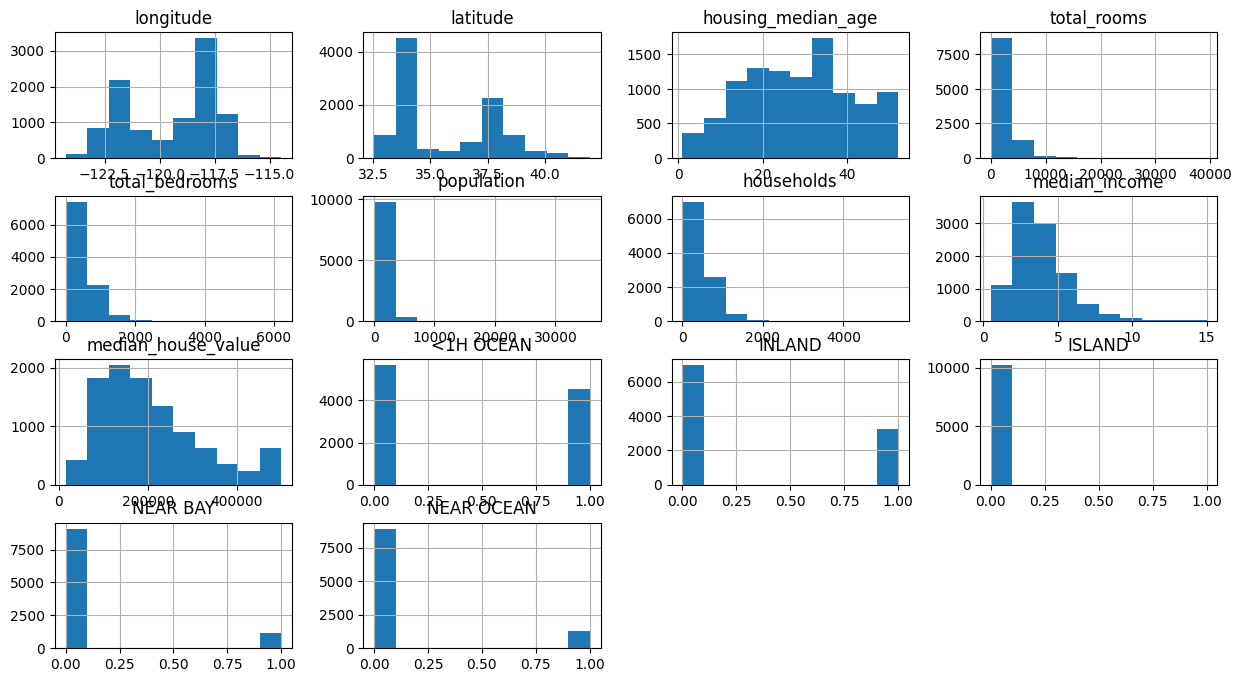

In [68]:
training_data.hist(figsize=(15,8))

In [69]:
training_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.923349,-0.114960,0.058362,0.079619,0.111165,0.067970,-0.000734,-0.031120,0.323278,-0.059096,0.006113,-0.477630,0.049039
latitude,-0.923349,1.000000,0.012787,-0.046535,-0.075300,-0.116945,-0.082384,-0.092465,-0.159152,-0.450476,0.355861,-0.010495,0.357582,-0.161265
housing_median_age,-0.114960,0.012787,1.000000,-0.361552,-0.320775,-0.292611,-0.302751,-0.110844,0.108528,0.046356,-0.236267,-0.001177,0.261895,0.015085
total_rooms,0.058362,-0.046535,-0.361552,1.000000,0.929738,0.853473,0.917945,0.189310,0.126024,-0.007061,0.035551,-0.004318,-0.033917,-0.007169
total_bedrooms,0.079619,-0.075300,-0.320775,0.929738,1.000000,0.871529,0.979168,-0.014512,0.043692,0.015503,-0.001124,-0.000344,-0.028163,0.004922
population,0.111165,-0.116945,-0.292611,0.853473,0.871529,1.000000,0.901503,-0.001372,-0.028663,0.070024,-0.012196,-0.005867,-0.069696,-0.021744
households,0.067970,-0.082384,-0.302751,0.917945,0.979168,0.901503,1.000000,0.005083,0.057850,0.039825,-0.033130,-0.004301,-0.020388,0.006197
median_income,-0.000734,-0.092465,-0.110844,0.189310,-0.014512,-0.001372,0.005083,1.000000,0.688759,0.176035,-0.236238,-0.008876,0.050704,0.020289
median_house_value,-0.031120,-0.159152,0.108528,0.126024,0.043692,-0.028663,0.057850,0.688759,1.000000,0.266661,-0.483646,0.020687,0.146830,0.139801
<1H OCEAN,0.323278,-0.450476,0.046356,-0.007061,0.015503,0.070024,0.039825,0.176035,0.266661,1.000000,-0.611107,-0.008854,-0.314800,-0.341404


<Axes: >

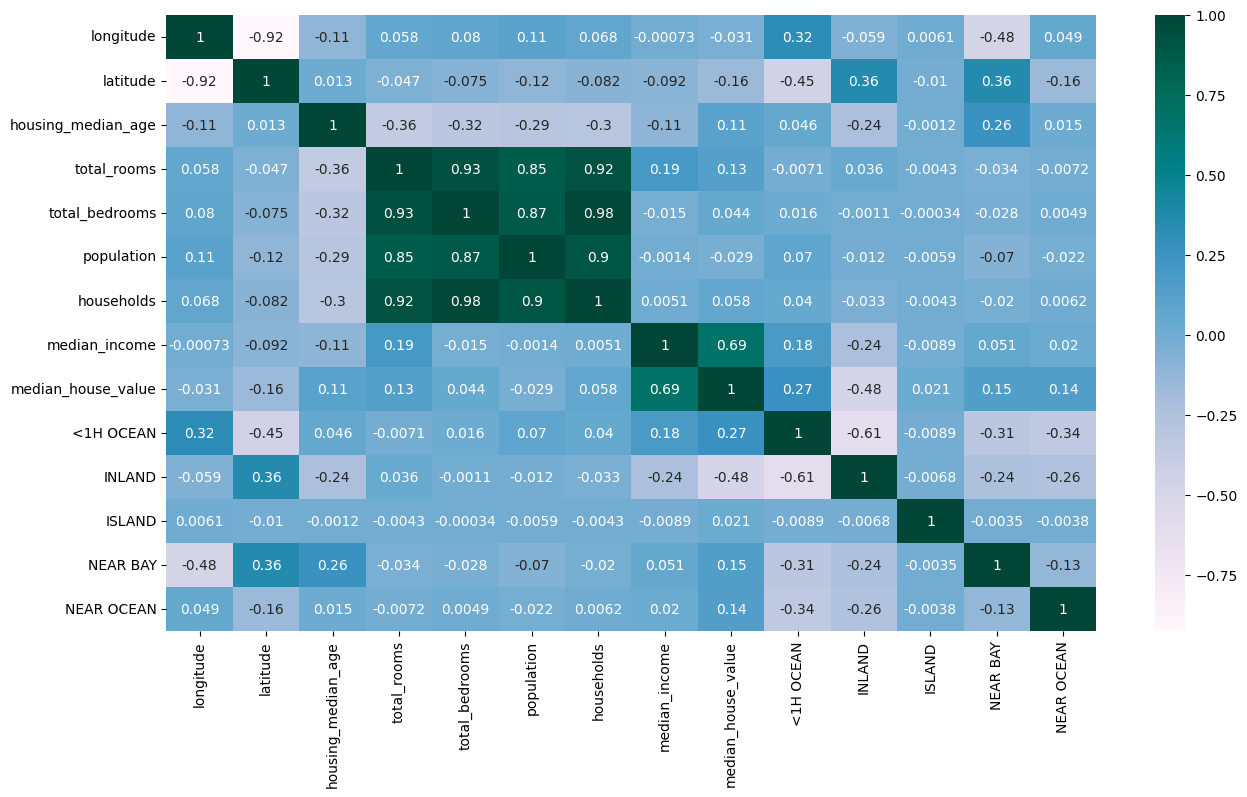

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(training_data.corr(),annot=True,cmap="PuBuGn")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

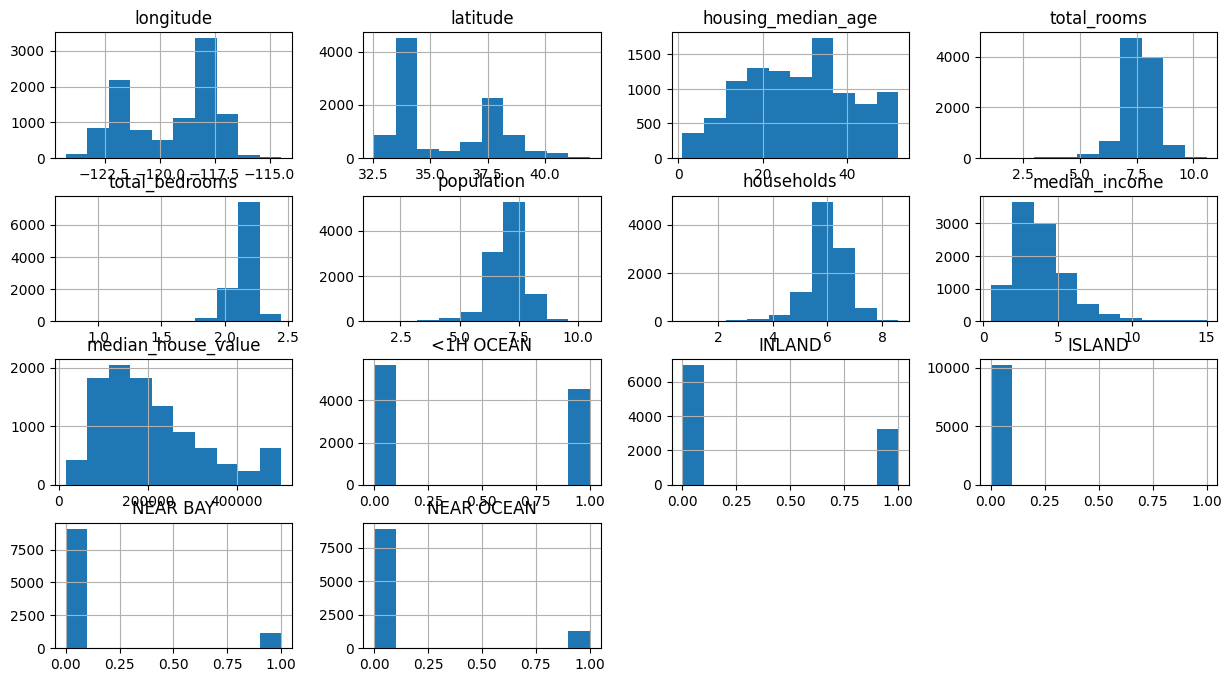

In [71]:
training_data['total_rooms']=np.log(training_data['total_rooms']+1)
training_data['total_bedrooms']=np.log(training_data['total_rooms']+1)
training_data['population']=np.log(training_data['population']+1)
training_data['households']=np.log(training_data['households']+1)
training_data.hist(figsize=(15,8))

In [72]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13475,-117.40,34.09,5.0,6190.0,993.0,3615.0,963.0,4.4034,INLAND
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,INLAND
4892,-118.25,34.01,28.0,481.0,136.0,596.0,128.0,1.2396,<1H OCEAN
17098,-122.25,37.46,33.0,6841.0,950.0,2681.0,980.0,7.1088,NEAR OCEAN
13152,-121.51,36.86,36.0,1019.0,168.0,602.0,169.0,2.6250,INLAND
...,...,...,...,...,...,...,...,...,...
20086,-120.30,37.99,23.0,1908.0,383.0,984.0,374.0,2.5170,INLAND
3638,-118.43,34.22,34.0,1588.0,360.0,1080.0,340.0,3.6600,<1H OCEAN
12812,-121.53,38.61,5.0,8149.0,1913.0,2933.0,1616.0,3.6788,INLAND
8330,-118.30,33.93,35.0,1300.0,356.0,1216.0,326.0,1.2000,<1H OCEAN


In [ ]:
training_data



<Axes: >

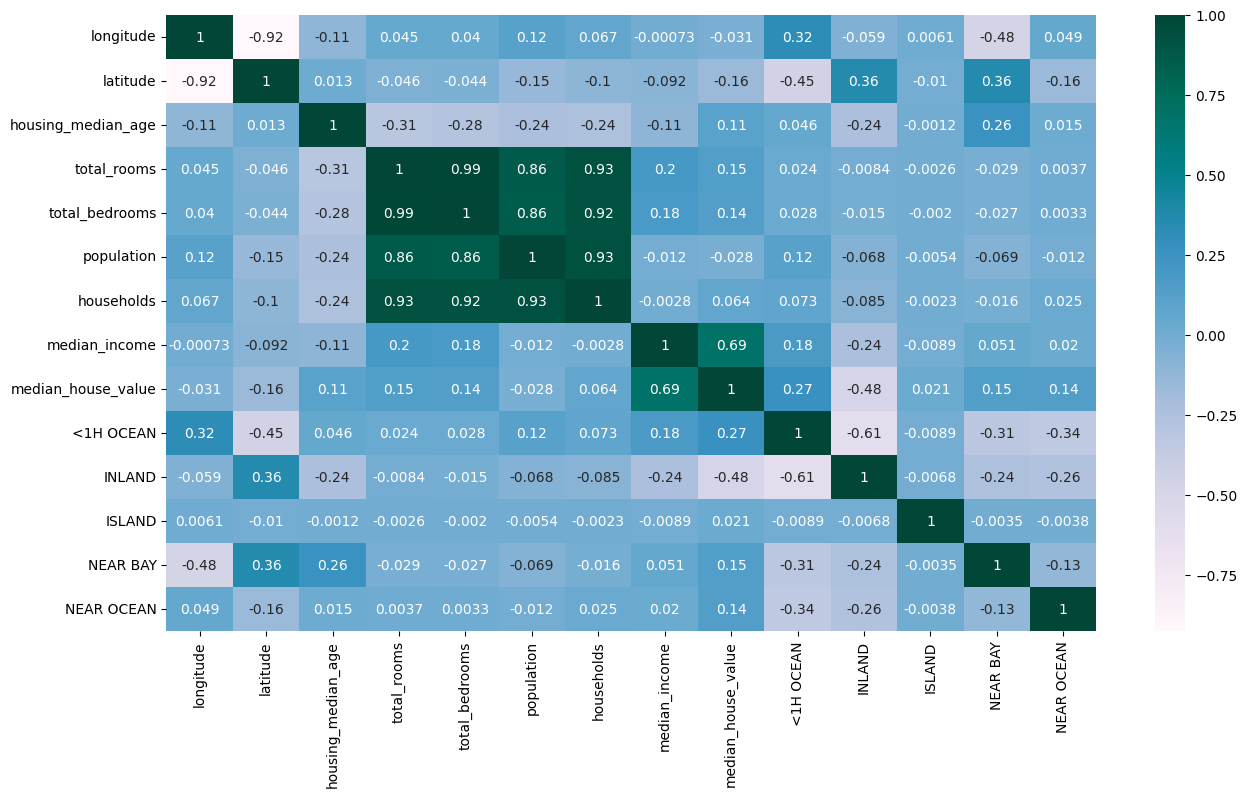

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(training_data.corr(),annot=True,cmap="PuBuGn")

<Axes: xlabel='latitude', ylabel='longitude'>

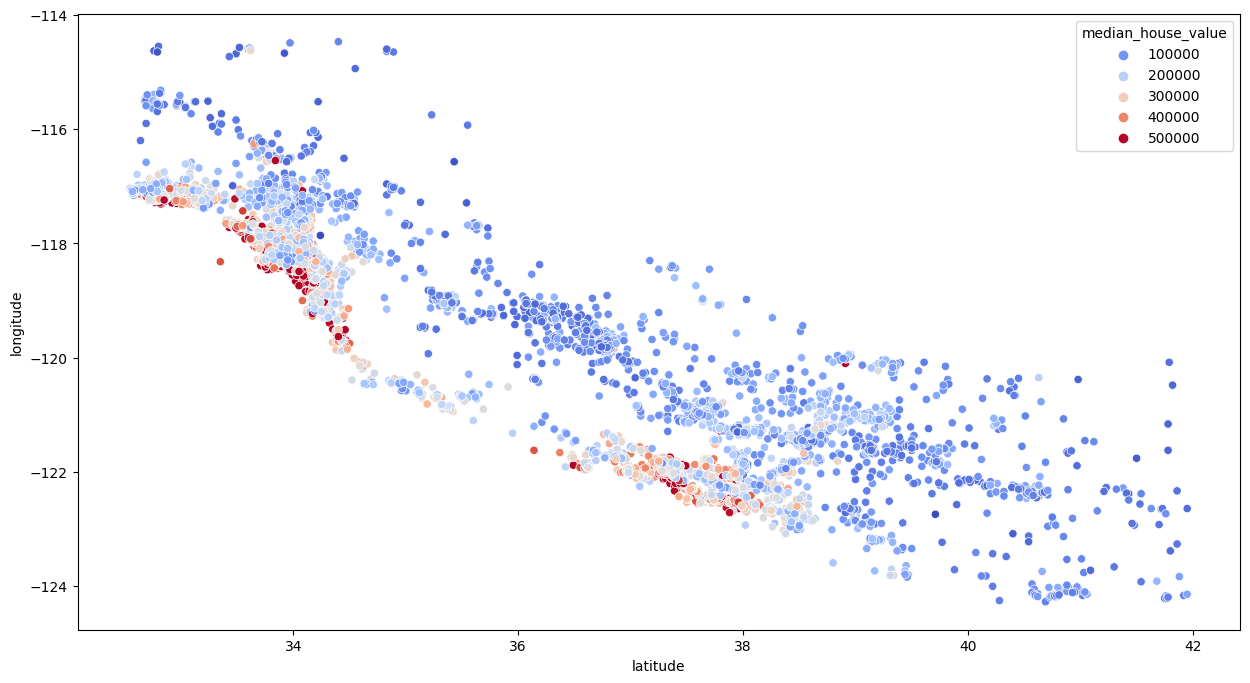

In [75]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=training_data,hue="median_house_value",palette="coolwarm")


DATA ENGINEERING

<Axes: >

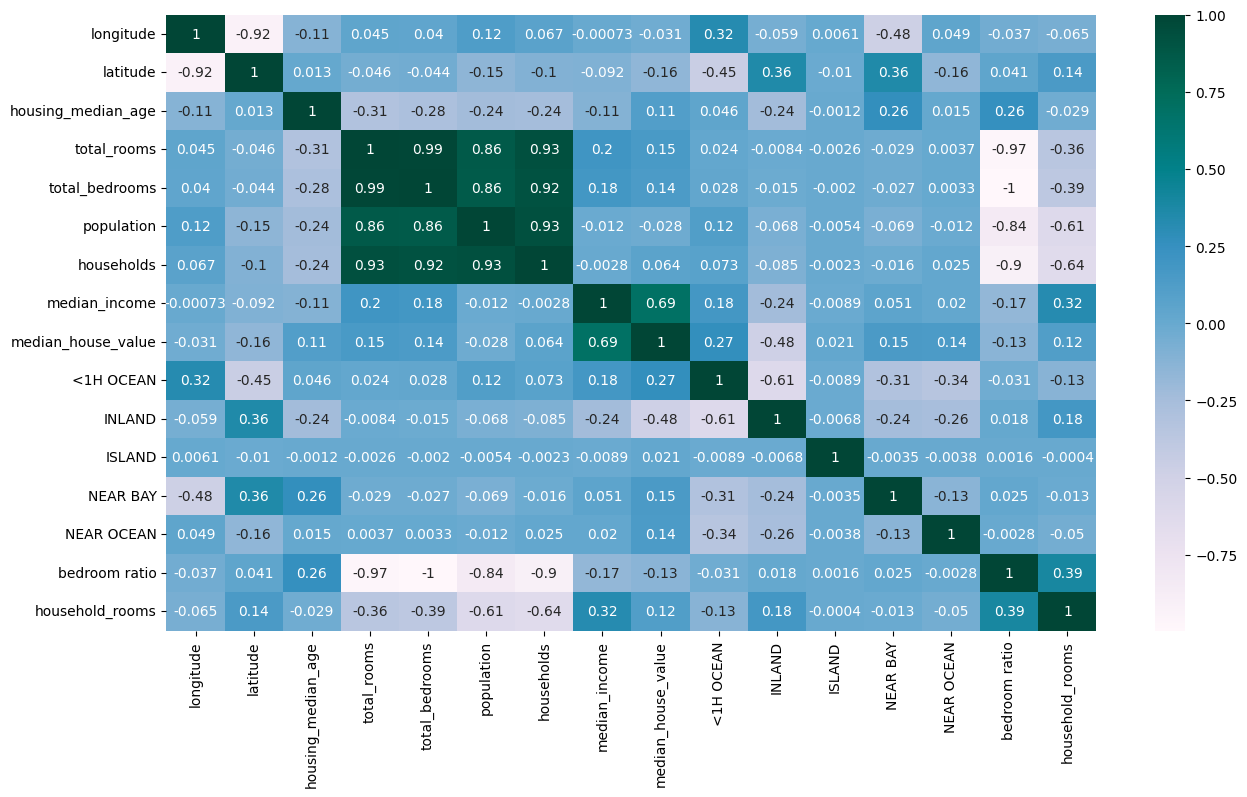

In [76]:
training_data['bedroom ratio']=training_data['total_bedrooms']/training_data['total_rooms']
training_data['household_rooms']=training_data['total_rooms']/training_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(training_data.corr(),annot=True,cmap="PuBuGn")

Evaluation for train data


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train,y_train=training_data.drop(['median_house_value'],axis=1),training_data['median_house_value']

X_train_scaled=scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)
LinearRegression()

LinearRegression()

Evaluation For Test data(using Linear regression)

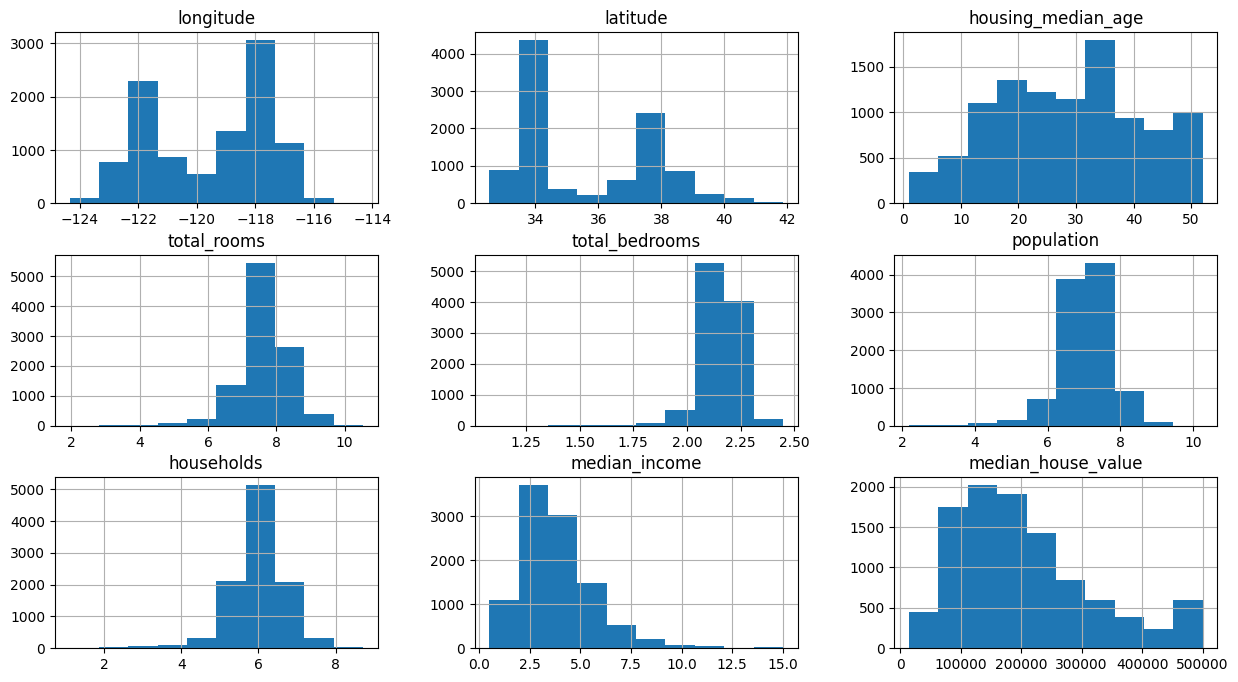

In [78]:
test_data=X_test.join(y_test)


test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_rooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data.hist(figsize=(15,8))

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [79]:
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [80]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom ratio,household_rooms
383,-122.16,37.74,47.0,6.715383,2.043216,6.280396,5.117994,2.6250,0,0,0,1,0,0.304259,1.312112
20382,-118.85,34.14,16.0,8.321178,2.232289,7.251345,6.329721,8.1064,1,0,0,0,0,0.268266,1.314620
3813,-118.48,34.20,26.0,7.614805,2.153482,7.343426,6.242223,2.8974,1,0,0,0,0,0.282802,1.219887
4973,-118.28,34.00,42.0,7.336286,2.120618,7.167038,5.942799,2.0938,1,0,0,0,0,0.289059,1.234483
6001,-117.75,34.09,36.0,8.037543,2.201387,7.422374,6.302619,4.2143,0,1,0,0,0,0.273888,1.275270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17291,-119.63,34.40,29.0,8.259976,2.225701,7.144407,6.419995,6.0069,1,0,0,0,0,0.269456,1.286602
14221,-117.06,32.66,24.0,7.858641,2.181393,7.388946,6.129050,3.5066,0,0,0,0,1,0.277579,1.282196
4562,-118.26,34.06,15.0,5.789960,1.915445,6.196444,4.663439,1.4886,1,0,0,0,0,0.330822,1.241564
1560,-121.95,37.78,4.0,9.592400,2.360137,8.633019,7.855545,6.3942,1,0,0,0,0,0.246042,1.221099


In [81]:
test_data
reg.score(X_test,y_test)

0.6646701528356154

In [83]:
X_test_scaled=scaler.fit_transform(X_test)
reg.score(X_test_scaled,y_test)

0.6649194281456552

Random Forest regressor Model

In [96]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
forest.score(X_test,y_test)

0.8051503724690148

Gridsearch cross validation


In [104]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={"n_estimators":[100,200,300],"max_features":[2,4,6,8]}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [105]:
best_forest=grid_search.best_estimator_
best_forest.score(X_test,y_test)

0.8099856398831762